In [1]:
# We connect to Google Drive to get the necessary files from there
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Directories
# Base directory containing the dataset
b_dir = '/content/drive/MyDrive/mushrooms'

# Directories for training, validation, and testing sets
train_dir = b_dir + '/training'
vali_dir = b_dir + '/validation'
test_dir = b_dir + '/testing'

# Directories for mushrooms in the training set
train_fly_agaric_dir = b_dir + '/training/fly_agaric'
train_morel_dir = b_dir + '/training/morel'
train_porcini_dir = b_dir + '/training/porcini'
train_row_dir = b_dir + '/training/row'
train_svinuhi_dir = b_dir + '/training/svinuhi'
train_volnushki_dir = b_dir + '/training/volnushki'

# Directories for mushrooms in the validation set
vali_fly_agaric_dir = b_dir + '/validation/fly_agaric'
vali_morel_dir = b_dir + '/validation/morels'
vali_porcini_dir = b_dir + '/validation/porcini'
vali_row_dir = b_dir + '/validation/row'
vali_svinuhi_dir = b_dir + '/validation/svinuhi'
vali_volnushki_dir = b_dir + '/validation/volnushki'

# Directories for mushrooms in the test set
test_fly_agaric_dir = b_dir + '/testing/fly_agaric'
test_morel_dir = b_dir + '/testing/morels'
test_porcini_dir = b_dir + '/testing/porcini'
test_row_dir = b_dir + '/testing/row'
test_svinuhi_dir = b_dir + '/testing/svinuhi'
test_volnushki_dir = b_dir + '/testing/volnushki'


import os, shutil
# Display the total number of images in each category
print('total training fly agaric images:', len(os.listdir(train_fly_agaric_dir)))
print('total training morel images:', len(os.listdir(train_morel_dir)))
print('total training porcini images:', len(os.listdir(train_porcini_dir)))
print('total training row images:', len(os.listdir(train_row_dir)))
print('total training svinuhi images:', len(os.listdir(train_svinuhi_dir)))
print('total training volnushki images:', len(os.listdir(train_volnushki_dir)))

print('total validation fly agaric images:', len(os.listdir(vali_fly_agaric_dir)))
print('total validation morel images:', len(os.listdir(vali_morel_dir)))
print('total validation porcini images:', len(os.listdir(vali_porcini_dir)))
print('total validation row images:', len(os.listdir(vali_row_dir)))
print('total validation svinuhi images:', len(os.listdir(vali_svinuhi_dir)))
print('total validation volnushki images:', len(os.listdir(vali_volnushki_dir)))

print('total test fly agaric images:', len(os.listdir(test_fly_agaric_dir)))
print('total test morel images:', len(os.listdir(test_morel_dir)))
print('total test porcini images:', len(os.listdir(test_porcini_dir)))
print('total test row images:', len(os.listdir(test_row_dir)))
print('total test svinuhi images:', len(os.listdir(test_svinuhi_dir)))
print('total test volnushki images:', len(os.listdir(test_volnushki_dir)))

total training fly agaric images: 100
total training morel images: 100
total training porcini images: 100
total training row images: 100
total training svinuhi images: 100
total training volnushki images: 100
total validation fly agaric images: 40
total validation morel images: 40
total validation porcini images: 40
total validation row images: 40
total validation svinuhi images: 40
total validation volnushki images: 40
total test fly agaric images: 20
total test morel images: 20
total test porcini images: 20
total test row images: 20
total test svinuhi images: 20
total test volnushki images: 20


In [5]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2


img_width, img_height = 180, 180
epochs = 50
batch_size = 32


validation_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


# Image generator for training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    vali_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


# Creating a model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Found 600 images belonging to 6 classes.
Found 240 images belonging to 6 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 41, 41, 128)       73856     
                                      

In [6]:
history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size)

Epoch 1/50
18/18 [==============================] - 11s 511ms/step - loss: 1.7990 - accuracy: 0.1391 - val_loss: 1.7886 - val_accuracy: 0.1696
Epoch 2/50
18/18 [==============================] - 10s 525ms/step - loss: 1.7340 - accuracy: 0.1690 - val_loss: 1.5555 - val_accuracy: 0.2054
Epoch 3/50
18/18 [==============================] - 10s 540ms/step - loss: 1.6040 - accuracy: 0.2746 - val_loss: 1.4735 - val_accuracy: 0.3304
Epoch 4/50
18/18 [==============================] - 11s 641ms/step - loss: 1.3961 - accuracy: 0.3697 - val_loss: 1.2424 - val_accuracy: 0.3973
Epoch 5/50
18/18 [==============================] - 9s 522ms/step - loss: 1.3198 - accuracy: 0.3556 - val_loss: 1.1860 - val_accuracy: 0.3929
Epoch 6/50
18/18 [==============================] - 10s 534ms/step - loss: 1.2676 - accuracy: 0.4313 - val_loss: 1.3641 - val_accuracy: 0.4286
Epoch 7/50
18/18 [==============================] - 10s 540ms/step - loss: 1.1836 - accuracy: 0.5000 - val_loss: 1.0062 - val_accuracy: 0.5580


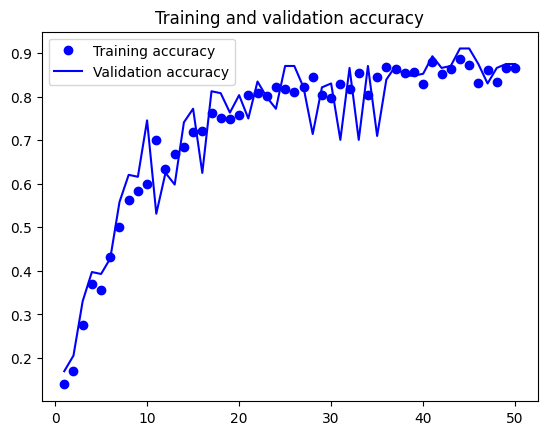

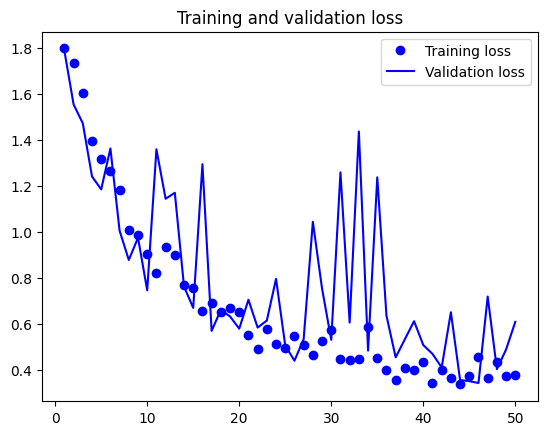

In [7]:
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_training(history)

In [8]:
# Creating a model
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(6, activation='softmax'))

# Compiling the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model2.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size)

Epoch 1/30
18/18 [==============================] - 12s 508ms/step - loss: 1.7991 - accuracy: 0.1268 - val_loss: 1.7866 - val_accuracy: 0.1741
Epoch 2/30
18/18 [==============================] - 8s 466ms/step - loss: 1.7336 - accuracy: 0.2465 - val_loss: 1.7504 - val_accuracy: 0.2054
Epoch 3/30
18/18 [==============================] - 10s 555ms/step - loss: 1.7924 - accuracy: 0.1514 - val_loss: 1.7830 - val_accuracy: 0.1652
Epoch 4/30
18/18 [==============================] - 9s 527ms/step - loss: 1.7747 - accuracy: 0.2306 - val_loss: 1.6662 - val_accuracy: 0.2188
Epoch 5/30
18/18 [==============================] - 9s 531ms/step - loss: 1.7200 - accuracy: 0.2641 - val_loss: 1.5713 - val_accuracy: 0.3393
Epoch 6/30
18/18 [==============================] - 8s 455ms/step - loss: 1.5341 - accuracy: 0.3415 - val_loss: 1.5845 - val_accuracy: 0.3125
Epoch 7/30
18/18 [==============================] - 10s 550ms/step - loss: 1.4807 - accuracy: 0.3486 - val_loss: 1.2921 - val_accuracy: 0.4152
Epo

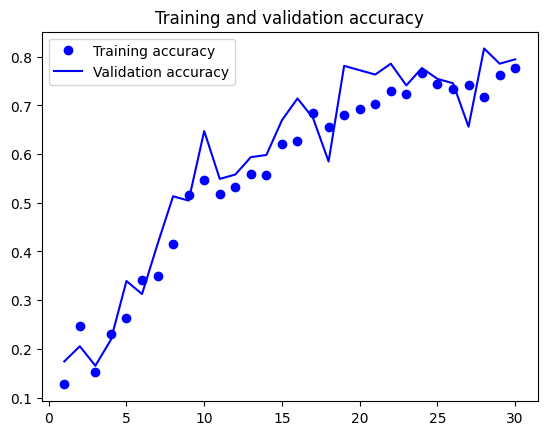

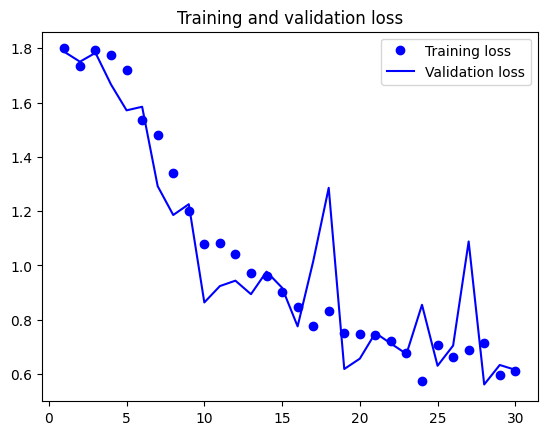

In [9]:
plot_training(history)

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Scaling the pixel values to the range [0, 1]

# Create a generator for the test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Don't shuffle the images to keep track of their actual labels
)

# Evaluate the model on the test data
scores = model2.evaluate(test_generator)

# Extracting the metrics (e.g., loss and accuracy)
loss = scores[0]
accuracy = scores[1]

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Found 120 images belonging to 6 classes.
4/4 [==============================] - 71s 24s/step - loss: 0.3562 - accuracy: 0.8833
Test Loss: 0.3562215268611908
Test Accuracy: 0.8833333253860474


In [12]:
model2.save("/content/my_model2.h5")
!ls -lha
from google.colab import files
files.download("/content/my_model2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


total 19M
drwxr-xr-x 1 root root 4.0K Mar  6 14:39 .
drwxr-xr-x 1 root root 4.0K Mar  6 12:59 ..
drwxr-xr-x 4 root root 4.0K Mar  4 14:27 .config
drwx------ 6 root root 4.0K Mar  6 13:04 drive
-rw-r--r-- 1 root root  19M Mar  6 14:41 my_model2.h5
drwxr-xr-x 1 root root 4.0K Mar  4 14:28 sample_data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>